<a href="https://colab.research.google.com/github/StetskoSergey/pida5_stetsko/blob/master/mds%20homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма:
strategy, maxiter, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### Допзадание

Найти множество параметров (strategy=..., maxiter=..., ..., updating=...), которые требуют минимального количества итераций.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution
from scipy.optimize import basinhopping

%matplotlib inline

In [0]:
strategy = ['strategy',['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp','best2exp','rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']]
maxiter = ['maxiter',np.linspace(10, 100, num=10, dtype = int)] # максимальное число циклов, пока все население эволюционирует
popsize = ['popsize',np.linspace(1, 100, num=10, dtype = int)] # Множитель для установки общей численности населения.
tol = ['tol',np.linspace(0.01, 0.5, num=10)] # float Относительный допуск на сходимость
mutation = ['mutation',np.linspace(0.0, 1.9, num=10)] # float Постоянная мутация. В литературе это также известно как дифференциальный вес, обозначаемый F. Если он указан как поплавок, он должен быть в диапазоне [0, 2].
recombination = ['recombination',np.linspace(0.0, 1.0, num=10)] # float Константа рекомбинации должна находиться в диапазоне [0, 1]. В литературе это также известно как вероятность кроссовера, обозначаемая CR. Увеличение этого значения позволяет большему числу мутантов прогрессировать в следующее поколение, но с риском стабильности популяции.
updating = ['updating',['immediate', 'deferred']]  # {‘immediate’, ‘deferred’} Если "немедленно", то вектор наилучшего решения непрерывно обновляется в течение одного поколения [4]. Это может привести к более быстрой конвергенции, поскольку пробные векторы могут использовать преимущества непрерывного улучшения лучшего решения. С "отложенным", лучший вектор решения обновляется один раз в поколение 



In [0]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.])

In [0]:
def result_arr(**kwargs):
  res = differential_evolution(ackley, bounds, **kwargs, seed=42)
  return {'nit':res['nit'],'x':res['x']}



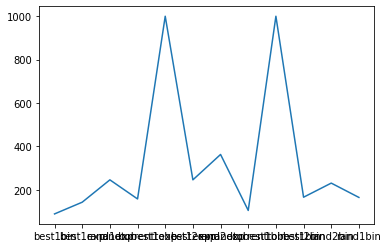

In [0]:
plt.plot(strategy,[result_arr(strategy=i) for i in strategy])
plt.show() 

In [0]:
sp = [result_arr(strategy=i) for i in strategy[1]]
print(list(zip(strategy[1],sp)))

[('best1bin', {'nit': 89, 'x': array([0., 0.])}), ('best1exp', {'nit': 143, 'x': array([0., 0.])}), ('rand1exp', {'nit': 246, 'x': array([0., 0.])}), ('randtobest1exp', {'nit': 158, 'x': array([0., 0.])}), ('currenttobest1exp', {'nit': 1000, 'x': array([0., 0.])}), ('best2exp', {'nit': 246, 'x': array([0., 0.])}), ('rand2exp', {'nit': 363, 'x': array([0., 0.])}), ('randtobest1bin', {'nit': 105, 'x': array([0., 0.])}), ('currenttobest1bin', {'nit': 1000, 'x': array([0., 0.])}), ('best2bin', {'nit': 166, 'x': array([0., 0.])}), ('rand2bin', {'nit': 231, 'x': array([0., 0.])}), ('rand1bin', {'nit': 165, 'x': array([0., 0.])})]


Лучшая стратегия - ('best1bin', 89)

[(10, (10, array([-4.68011705e-09, -3.37908951e-10]))), (20, (20, array([-2.89997015e-09, -2.81305071e-09]))), (30, (30, array([-3.16442503e-09, -5.16887952e-09]))), (40, (40, array([-8.26714866e-10, -4.71251506e-09]))), (50, (50, array([-8.79020190e-10, -1.27768907e-10]))), (60, (60, array([1.53677071e-11, 3.64153152e-12]))), (70, (70, array([-1.46549439e-13,  2.73114864e-13]))), (80, (80, array([2.22044605e-15, 0.00000000e+00]))), (90, (89, array([0., 0.]))), (100, (89, array([0., 0.])))]


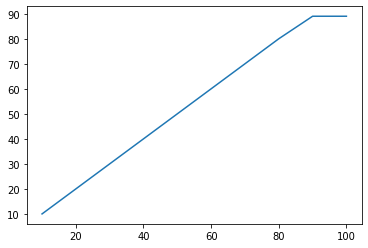

In [0]:
sp = [result_arr(maxiter=i) for i in maxiter]
print(list(zip(maxiter,sp)))
plt.plot(maxiter,[i[0] for i in sp])
plt.show()

[(1, (7, array([-2.86743508e-08,  9.52166523e-01]))), (12, (97, array([0., 0.]))), (23, (93, array([0., 0.]))), (34, (98, array([0., 0.]))), (45, (96, array([0., 0.]))), (56, (103, array([0., 0.]))), (67, (100, array([0., 0.]))), (78, (97, array([0., 0.]))), (89, (98, array([0., 0.]))), (100, (101, array([0., 0.])))]


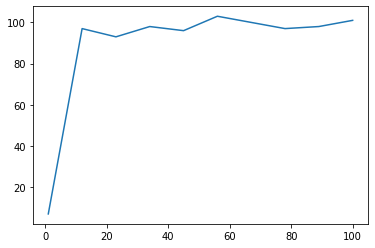

In [0]:
sp = [result_arr(popsize=i) for i in popsize]
print(list(zip(popsize,sp)))
plt.plot(popsize,[i[0] for i in sp])
plt.show()


[(0.01, (89, array([0., 0.]))), (0.06444444444444444, (89, array([0., 0.]))), (0.11888888888888888, (89, array([0., 0.]))), (0.17333333333333334, (89, array([0., 0.]))), (0.22777777777777777, (89, array([0., 0.]))), (0.2822222222222222, (89, array([0., 0.]))), (0.33666666666666667, (1, array([2.46886987e-08, 9.52166534e-01]))), (0.3911111111111111, (1, array([2.46886987e-08, 9.52166534e-01]))), (0.44555555555555554, (1, array([2.46886987e-08, 9.52166534e-01]))), (0.5, (1, array([2.46886987e-08, 9.52166534e-01])))]


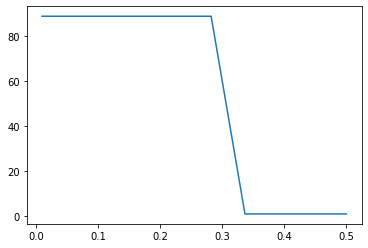

In [0]:
sp = [result_arr(tol=i) for i in tol]
print(list(zip(tol,sp)))
plt.plot(tol,[i[0] for i in sp])
plt.show()


[(0.0, (3, array([ 0.96847764, -0.96847758]))), (0.2111111111111111, (29, array([2.22044605e-15, 2.22044605e-15]))), (0.4222222222222222, (50, array([0., 0.]))), (0.6333333333333333, (82, array([0., 0.]))), (0.8444444444444444, (120, array([0., 0.]))), (1.0555555555555556, (162, array([0., 0.]))), (1.2666666666666666, (239, array([0., 0.]))), (1.4777777777777779, (294, array([0., 0.]))), (1.6888888888888889, (101, array([-3.67855733e-09, -4.07172313e-09]))), (1.9, (246, array([-6.64750477e-10, -2.23598917e-12])))]


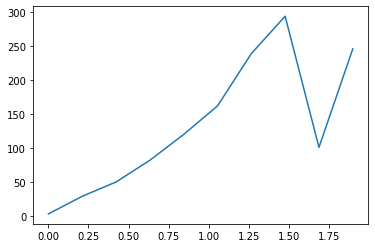

In [0]:
sp = [result_arr(mutation=i) for i in mutation]
print(list(zip(mutation,sp)))
plt.plot(mutation,[i[0] for i in sp])
plt.show()


[(0.0, (1000, array([0., 0.]))), (0.1111111111111111, (125, array([0., 0.]))), (0.2222222222222222, (151, array([0., 0.]))), (0.3333333333333333, (107, array([0., 0.]))), (0.4444444444444444, (108, array([0., 0.]))), (0.5555555555555556, (105, array([0., 0.]))), (0.6666666666666666, (95, array([0., 0.]))), (0.7777777777777777, (88, array([0., 0.]))), (0.8888888888888888, (89, array([0., 0.]))), (1.0, (81, array([0., 0.])))]


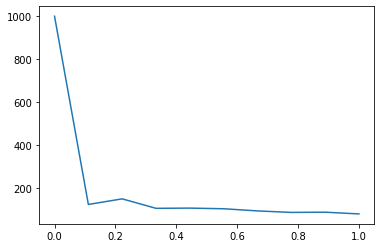

In [0]:
sp = [result_arr(recombination=i) for i in recombination]
print(list(zip(recombination,sp)))
plt.plot(recombination,[i[0] for i in sp])
plt.show()


[('immediate', (89, array([0., 0.]))), ('deferred', (125, array([0., 0.])))]


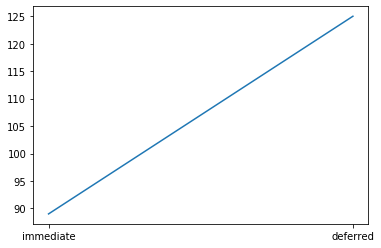

In [0]:
sp = [result_arr(updating=i) for i in updating]
print(list(zip(updating,sp)))
plt.plot(updating,[i[0] for i in sp])
plt.show()


Выведем значения функции при разных комбинация трех параметров

In [0]:
[ (i,j,k, result_arr(maxiter=i,strategy=j,updating=k)) for i in maxiter for j in strategy for k in updating]

[(10,
  'best1bin',
  'immediate',
  (10, array([-4.68011705e-09, -3.37908951e-10]))),
 (10, 'best1bin', 'deferred', (10, array([-2.96373879e-09,  1.64291350e-10]))),
 (10,
  'best1exp',
  'immediate',
  (10, array([ 2.88791058e-12, -1.78279059e-09]))),
 (10, 'best1exp', 'deferred', (10, array([-6.61430531e-10, -7.02789925e-11]))),
 (10,
  'rand1exp',
  'immediate',
  (10, array([-4.01603847e-09, -4.45596607e-09]))),
 (10, 'rand1exp', 'deferred', (10, array([ 2.15273406e-09, -3.17602766e-09]))),
 (10,
  'randtobest1exp',
  'immediate',
  (10, array([-1.34818201e-09,  1.51584027e-09]))),
 (10,
  'randtobest1exp',
  'deferred',
  (10, array([-1.87805951e-09, -5.26832834e-09]))),
 (10,
  'currenttobest1exp',
  'immediate',
  (10, array([-6.66865518e-10, -3.12886157e-09]))),
 (10,
  'currenttobest1exp',
  'deferred',
  (10, array([-5.24002663e-09, -1.74655964e-09]))),
 (10,
  'best2exp',
  'immediate',
  (10, array([-4.29336960e-09, -2.53608049e-09]))),
 (10, 'best2exp', 'deferred', (10, a

Лучшая стратегия - best1bin

Лучший updating - immediate

maxiter - я так и не понял, при меньших 80 он заканчивается, просто не успевает дойти до минимума, я могу ограничить итерации хоть 5 циклами или даже 1. Не понятно как его оптимизировать ? возможно нужно просто следить, чтобы maxiter был не меньше требуемого количества циклов.